In [96]:
# data preprocessing
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# algorithms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# statistics
from statistics import mean
#plotting
import matplotlib.pyplot as plt

In [97]:
data = pd.read_csv('diabetes.csv')
data_array = np.array(data.drop(["Outcome"], axis=1))

# normalization
data_norm = (data_array - data_array.min()) / (data_array.max() - data_array.min())
data_norm = pd.DataFrame(data_norm,columns=data.columns[:-1])
data_norm = pd.concat([data_norm, data["Outcome"]], axis=1)
data_norm.tail()

# standarization
data_std = (data_array - data_array.mean()) / data_array.std()
data_std = pd.DataFrame(data_std,columns=data.columns[:-1])
data_std = pd.concat([data_std, data["Outcome"]], axis=1)
data_std.tail()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
763    -0.599349  0.959592       0.531311       0.051637  2.312958 -0.207044   
764    -0.736399  1.319347       0.428524      -0.308118 -0.770661 -0.140233   
765    -0.685005  1.302216       0.462786      -0.376643  1.148035 -0.321823   
766    -0.753530  1.387872       0.257212      -0.770661 -0.770661 -0.255012   
767    -0.753530  0.822542       0.428524      -0.239594 -0.770661 -0.249872   

     DiabetesPedigreeFunction       Age  Outcome  
763                 -0.767732  0.308605        0  
764                 -0.764837 -0.308118        0  
765                 -0.766464 -0.256725        0  
766                 -0.764683  0.034506        1  
767                 -0.765265 -0.376643        0

In [98]:
x = data.drop(["Outcome"], axis=1)
y = data.Outcome
tries = 10
knn_accuracy = []
for i in range(tries):
    X_train, X_test, y_train, y_test = train_test_split(x, y)

    neigh = KNeighborsClassifier(n_neighbors=10)
    neigh.fit(X_train, y_train)
    knn_accuracy.append(neigh.score(X_test,y_test) * 100.0)
knn_accuracy[0]

# normalized
x = data_norm.drop(["Outcome"], axis=1)
y = data_norm.Outcome
knn_norm_accuracy = []
for i in range(tries):
    X_train, X_test, y_train, y_test = train_test_split(x, y)

    neigh = KNeighborsClassifier(n_neighbors=10)
    neigh.fit(X_train, y_train)
    knn_norm_accuracy.append(neigh.score(X_test,y_test) * 100.0)
knn_norm_accuracy[0]

# standardized
x = data_std.drop(["Outcome"], axis=1)
y = data_std.Outcome
knn_std_accuracy = []
for i in range(tries):
    X_train, X_test, y_train, y_test = train_test_split(x, y)

    neigh = KNeighborsClassifier(n_neighbors=10)
    neigh.fit(X_train, y_train)
    knn_std_accuracy.append(neigh.score(X_test,y_test) * 100.0)
knn_std_accuracy[0]

77.60416666666666

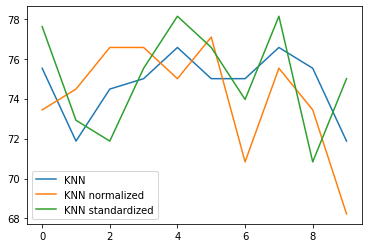

In [99]:
ax_knn = plt.plot(list(range(tries)), knn_accuracy, label="KNN")
ax_knn_norm = plt.plot(list(range(tries)), knn_norm_accuracy, label="KNN normalized")
ax_knn_std = plt.plot(list(range(tries)), knn_std_accuracy, label="KNN standardized")

plt.legend()
plt.show()